In [1]:
from ultralytics import YOLO
import os
from matplotlib import pyplot as plt
import numpy as np
import torch

In [2]:

# Create a new YOLO model from scratch

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8l.pt')

# model = torch.hub.load('ultralytics/yolov8', 'custom', path='yolov8l.pt', source='local')


In [89]:
# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='coco128.yaml', epochs=3)



Ultralytics YOLOv8.0.213 🚀 Python-3.11.3 torch-2.1.1 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

train: Scanning /Users/shehvincent/Documents/IoT/Motorcycle Detection/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
val: Scanning /Users/shehvincent/Documents/IoT/Motorcycle Detection/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train9
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.8276     0.7285      1.116        201        640: 100%|██████████| 8/8 [06:37<00:00, 49.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:00<00:00, 30.06s/it]

                   all        128        929       0.74       0.78       0.84      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G     0.9316     0.7827      1.167        136        640: 100%|██████████| 8/8 [07:24<00:00, 55.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:12<00:00, 33.22s/it]

                   all        128        929      0.846      0.757      0.858      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/8 [00:23<?, ?it/s]


KeyboardInterrupt: 

In [90]:
# Evaluate the model's performance on the validation set

# Perform object detection on an image using the model
results = model('https://ultralytics.com/images/bus.jpg',save=True, classes = 3)

# Export the model to ONNX format
# success = model.export(format='onnx')



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /Users/shehvincent/Documents/IoT/Motorcycle Detection/bus.jpg: 640x480 (no detections), 456.2ms
Speed: 13.9ms preprocess, 456.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [10]:
inference_images = [os.path.join('./Test',img) for img in os.listdir('./Test') if ('.jpg' in img) or ('.png' in img)]
results = model(inference_images,save=True,  conf=0.4, classes = 3)
# rows = len(inference_images)//3 + 1
# for _, img in enumerate(inference_images):
#   img = os.path.join('./Test',img)
#   if ('.jpg' in img) or ('.png' in img):
    # results = model(img,save=True,  conf=0.4, classes = 3)
    # results.plot()
    
#     img = results[0].orig_img
#     plt.subplot(rows, columns, i+1)
#     plt.imshow(img)
#     plt.axis('off')
# plt.tight_layout()
# plt.show()

    



0: 640x640 5 motorcycles, 1: 640x640 6 motorcycles, 2: 640x640 3 motorcycles, 3: 640x640 5 motorcycles, 4: 640x640 4 motorcycles, 5: 640x640 14 motorcycles, 6: 640x640 9 motorcycles, 7: 640x640 6 motorcycles, 8: 640x640 6 motorcycles, 9: 640x640 7 motorcycles, 10: 640x640 14 motorcycles, 11: 640x640 3 motorcycles, 12: 640x640 14 motorcycles, 13: 640x640 10 motorcycles, 14: 640x640 5 motorcycles, 15: 640x640 13 motorcycles, 16: 640x640 6 motorcycles, 17: 640x640 5 motorcycles, 17882.0ms
Speed: 5.2ms preprocess, 993.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


# Illegal Parking

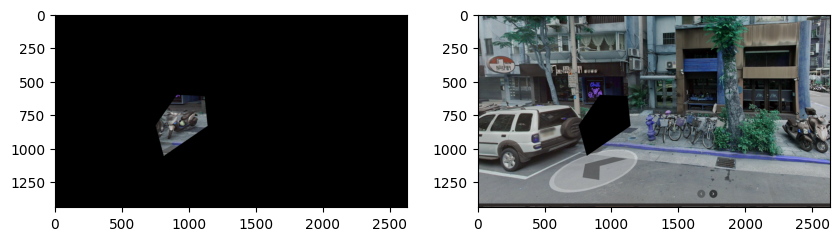

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO
model = YOLO('yolov8l.pt')
polygon_points = [(908, 602), (750, 829), (811, 1056), (1137, 833), (1114, 611), (924, 603)]
img = cv2.imread('rec_img.jpg')
pts = np.array(polygon_points, np.int64)
pts = pts.reshape((-1, 1, 2))

mask = np.zeros_like(img) #Create a black image with similar shape as original

cv2.fillPoly(mask, [pts], (255, 255, 255)) #Insert the polygon and fill it with white

result = cv2.bitwise_and(img, mask) #Perform intersection of the masked image and the original


illegal_park_img = cv2.fillPoly(img, [pts], (0, 0, 0)) #Insert the polygon and fill it with white
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow(result)
ax[1].imshow(illegal_park_img)



# Fake Parking Client

In [44]:
import os, random
img_list = os.listdir("./Test/")
file_path = './Test/'

img_name = random.choice(img_list)
path = f'{file_path}{img_name}'
img = cv2.imread(path)
_, encoded_img = cv2.imencode('.jpg', img)


In [42]:
img_name

'mobile01-476db7939fb09a974224d6595f01e284.jpg'